In [2]:
#선형 회귀

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
#훈련/테스트 세트 테이블 나누기, 특성 데이터는 2차원배열 변환

from sklearn.model_selection import train_test_split

#테이블 나누기
train_input,test_input, train_target,test_target = train_test_split(
    perch_length,perch_weight,random_state=42
)

# 각 세트를 2차원 배열로 변환시키기
train_input =train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [6]:
#최근접 이웃 개수 3개 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [7]:
#길이 50cm인 농어 무게 예측하기
print(knr.predict([[50]]))
#예측결과 1,033g 그러나 실제 무게는 1,500g

[1033.33333333]


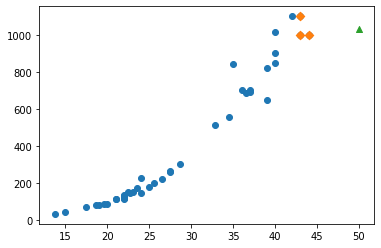

In [8]:
#이 농어와 최근접 이웃을 산점도에 표시하기
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구하기 kneighbors()메서드 사용
distances, indexes = knr.kneighbors([[50]])

#훈련 셋 산점도 그리기
plt.scatter(train_input, train_target)

#훈련 셋 중 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes],marker='D') #50cm,1033g 농어 주변 샘플

#50cm 농어 데이터
plt.scatter(50,1033,marker='^') #50cm,1033g인 농어를 삼각형으로 표시
plt.show()

#산점도 결과 가장 가까운 이웃의 농어는 45cm 부근의 농어
#k-최근접 이웃 알고리즘은 샘플들의 무게를 평균화시킴

In [10]:
#샘플 타깃의 평균 구하기
print(np.mean(train_target[indexes]))

#k-최근접 이웃 알고리즘은 가장 가까운 샘플을 찾아 타깃을 평균화시킴
#훈련셋 범위를 벗어나면 엉뚱한 값을 예측함.
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


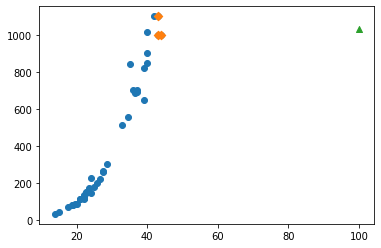

In [12]:
# 100cm 농어 이웃 구하기
distances,indexes = knr.kneighbors([[100]])

#훈련세트 산점도 그리기
plt.scatter(train_input,train_target)

#이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

#100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.show()

#확인 결과 이런식이면 아무리 커도 무게가 늘어나지 않는다!
#k-최근접 이웃을 이용해 문제를 해결하려면 가장 큰 농어가 포함되도록 다시 훈련 세트를 만들어야함.

In [13]:
#선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형회귀 모델 훈련
lr.fit(train_input,train_target)

#50cm 농어 예측
print(lr.predict([[50]]))

#y= ax+b
#y=농어 무게, x= 농어 길이
#농어무게 = a * 농어 길이 +b
#a = 기울기, b= y절편

[1241.83860323]


In [15]:
#데이터애 가장 잘 맞는 a,b찾기
#a=coef_ b=intercept_사용 
#머신러닝에서 기울기를 종종계수,가중치라고 부름
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


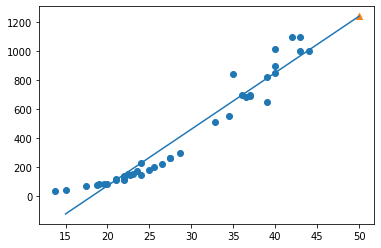

In [18]:
#농어 길이 15에서 50까지 직선 그리기

#훈련 세트 산점도 그리기
plt.scatter(train_input,train_target)

#15에서 50까지 1차 방정식 그래프를 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8,marker='^')
plt.show()

#이 직선이 선형화귀 알고리즘이 데이터셋에서 찾은 최적의 직선!

In [20]:
#훈련셋과 테스트셋에 대한 결정계수값 확인하기
print(lr.score(train_input,train_target)) #훈련 셋
print(lr.score(test_input,test_target))#테스트 셋

#훈련 셋에 대한 과대적합이라기 보다는 전체적으로 과소적합

0.9398463339976039
0.8247503123313558


In [22]:
#다항화귀 = 다항식을 사용한 선형회귀

#산점도에 맞추어 곡선 그리기
#numpy를 이용해 농어의 길이를 제곱해서 훈련셋에 추가 하기

train_poly = np.column_stack((train_input **2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

#새롭게 만든 데이터셋 크기 확인하기
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [23]:
#선형회귀모델 재훈련

lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))
#더 높은 값 예측

[1573.98423528]


In [24]:
#훈련한 계수, 절편 확인
print(lr.coef_,lr.intercept_)
#무게 = 1.01 * 길이*2-21.6 * 길이+116.05

[  1.01433211 -21.55792498] 116.05021078278276


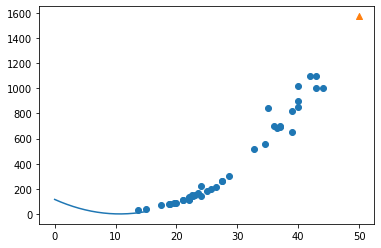

In [26]:
#다항회귀모델 산점도 그리기

#구간별 직선을 그리기 위해 15~49 정수 배열 생성
point = np.arange(15.50)

#훈련셋 산점도 그리기
plt.scatter(train_input,train_target)

#15~49 2차 방정식 그래프 그리기
plt.plot(point,1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50],[1574],marker='^')
plt.show()

In [28]:
#결정계수 평가
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

#과소적합이 조금 남아 있으나 점수가 크게 오름

0.9706807451768623
0.9775935108325122
